# **Introduction**
***Group 0+c***

This notebook addresses the tasks for Round 2 of the Data Science Digital Race 2025 on bank customer churn prediction. It includes data understanding, preprocessing (including outlier handling), model development, feature insights, and interpretation.

mount at google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import xgboost as xgb
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

import dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Bank Customer Churn Prediction.csv")

data exploration

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.shape

(10000, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


target variable

TASK Part A question 1


Churn value counts:
churn
0    7963
1    2037
Name: count, dtype: int64

Churn percentages:
churn
0    79.63
1    20.37
Name: proportion, dtype: float64

# Churn rate: 20.37%


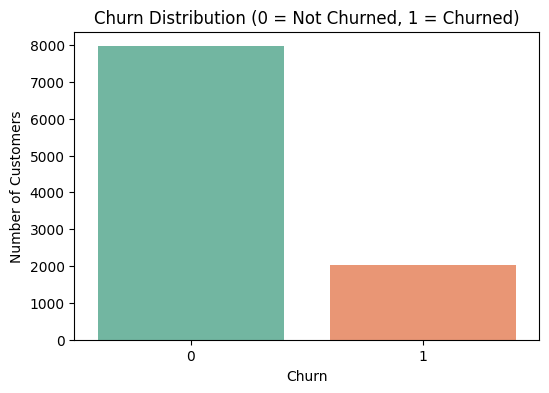

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\nChurn value counts:")
print(df['churn'].value_counts())
print("\nChurn percentages:")
print((df['churn'].value_counts(normalize=True) * 100).round(2))

churn_rate = df['churn'].value_counts(normalize=True)[1] * 100
print(f"\n# Churn rate: {churn_rate:.2f}%")

plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df, palette="Set2")
plt.title("Churn Distribution (0 = Not Churned, 1 = Churned)")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

TASK Part A question 2

Customer count by country:
 country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Customer percentage by country:
 country
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64


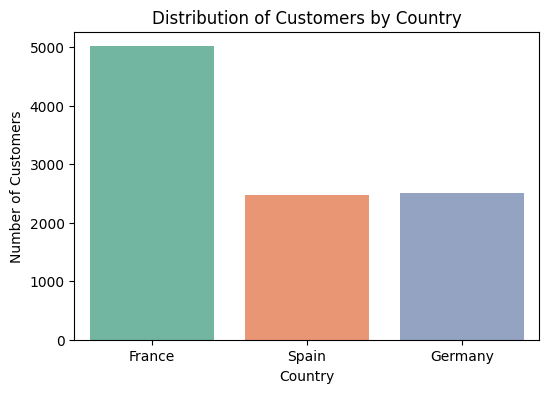

In [ ]:
country_counts = df['country'].value_counts()
country_percent = df['country'].value_counts(normalize=True) * 100

print("Customer count by country:\n", country_counts)
print("\nCustomer percentage by country:\n", country_percent)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='country', palette="Set2")
plt.title("Distribution of Customers by Country")
plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.show()


TASK Part A question 3

Average Credit Score by Churn Status:
 churn
0    651.853196
1    645.351497
Name: credit_score, dtype: float64


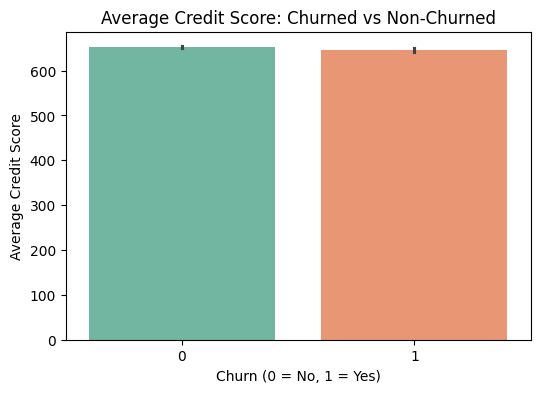

In [ ]:
avg_scores = df.groupby('churn')['credit_score'].mean()
print("Average Credit Score by Churn Status:\n", avg_scores)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(data=df, x='churn', y='credit_score', estimator='mean', palette="Set2")
plt.title("Average Credit Score: Churned vs Non-Churned")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Average Credit Score")
plt.show()


Part B

Data Preprocessing

Create target variable

In [ ]:
df['churn'].value_counts()
df['churn'] = df['churn'].astype(int)

check duplicate and missing

In [ ]:
duplicates = df[df.duplicated()]
print(duplicates)

print("Number of duplicate rows: ", df.duplicated().sum())

missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({
    'Feature': missing_counts.index,
    'Missing Count': missing_counts.values,
    'Missing %': missing_percent.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

print(missing_df)

Empty DataFrame
Columns: [customer_id, credit_score, country, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary, churn]
Index: []
Number of duplicate rows:  0
Empty DataFrame
Columns: [Feature, Missing Count, Missing %]
Index: []


The result shows that there is no duplicate and missing data in the dataset.

drop unused column

In [ ]:
df.drop(columns=['customer_id'], inplace=True)

Since the customer id is just an identifier and do not bring predictive meaning, this column is dropped.

Outlier Detection and Handling

Statistical Summary:
       credit_score           age        tenure        balance  \
count  10000.000000  10000.000000  10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288   
std       96.653299     10.487806      2.892174   62397.405202   
min      350.000000     18.000000      0.000000       0.000000   
25%      584.000000     32.000000      3.000000       0.000000   
50%      652.000000     37.000000      5.000000   97198.540000   
75%      718.000000     44.000000      7.000000  127644.240000   
max      850.000000     92.000000     10.000000  250898.090000   

       products_number  estimated_salary  
count     10000.000000      10000.000000  
mean          1.530200     100090.239881  
std           0.581654      57510.492818  
min           1.000000         11.580000  
25%           1.000000      51002.110000  
50%           1.000000     100193.915000  
75%           2.000000     149388.247500  
max           4.000000     199992.480000

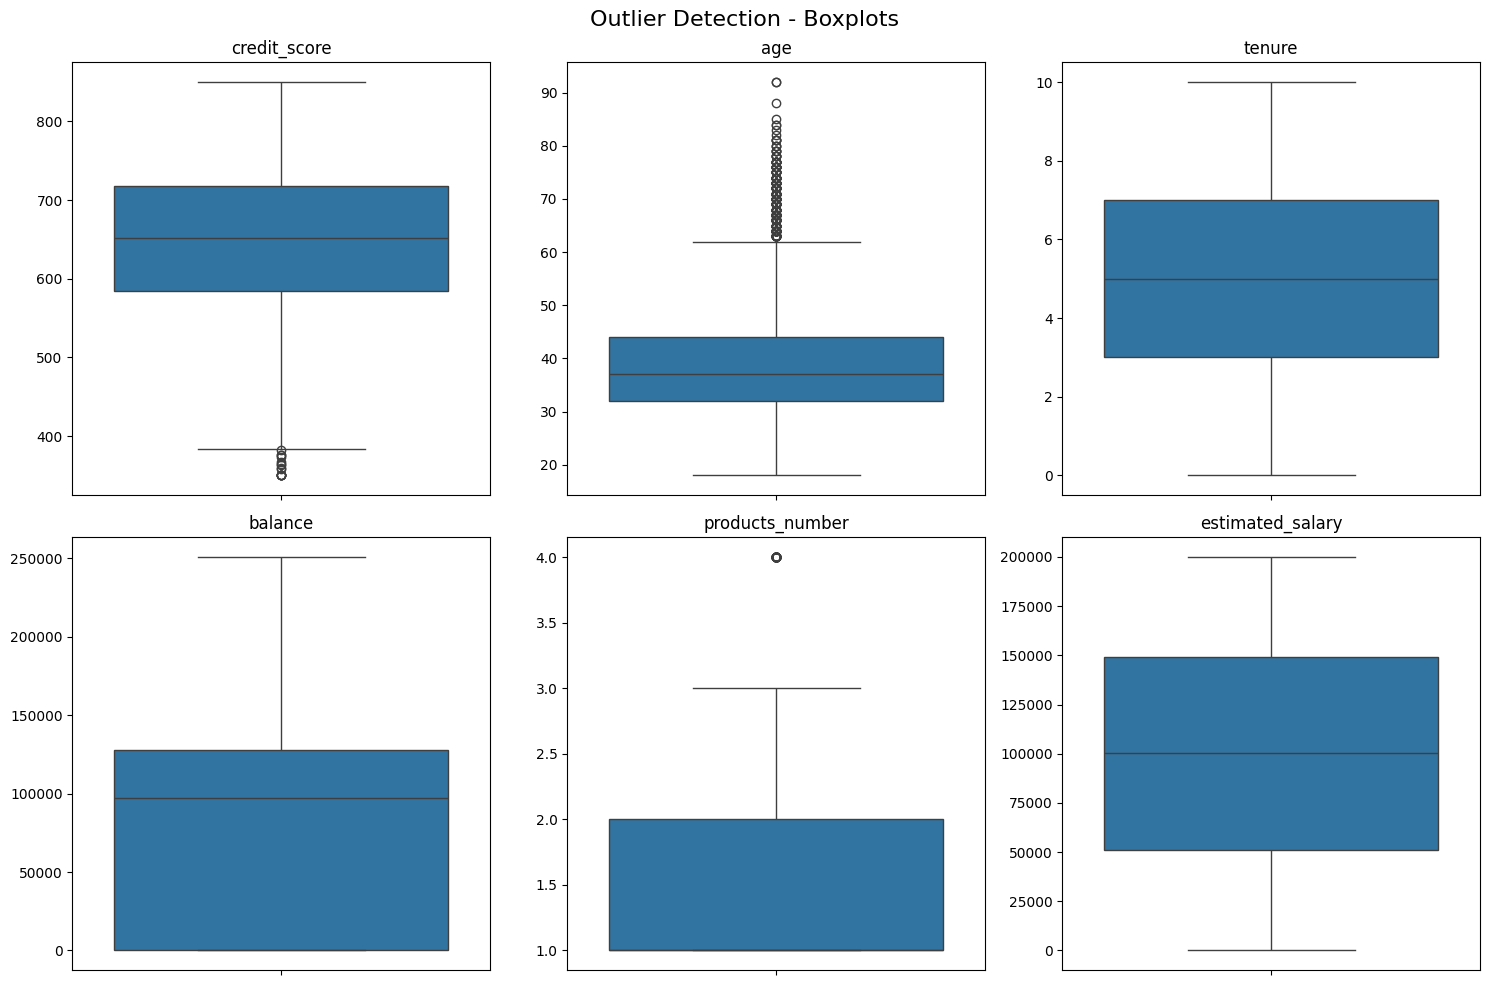


Overall churn rate: 20.37%


In [ ]:
# Numerical columns
numerical_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

# Statistical summary
print("Statistical Summary:")
print(df[numerical_cols].describe())

# Visualize outliers with boxplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Outlier Detection - Boxplots', fontsize=16)

for i, col in enumerate(numerical_cols):
    row, col_idx = i // 3, i % 3
    sns.boxplot(y=df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col}')
    axes[row, col_idx].set_ylabel('')

plt.tight_layout()
plt.show()

# IQR method for outlier detection and capping
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower_bound, upper_bound)

# Check churn rate in original data (for reference)
churn_rate = df['churn'].mean() * 100
print(f"\nOverall churn rate: {churn_rate:.2f}%")


train/test split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['churn'])
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train churn distribution:\n", y_train.value_counts(normalize=True))
print("Test churn distribution:\n", y_test.value_counts(normalize=True))


Train shape: (8000, 10) Test shape: (2000, 10)
Train churn distribution:
 churn
0    0.79625
1    0.20375
Name: proportion, dtype: float64
Test churn distribution:
 churn
0    0.7965
1    0.2035
Name: proportion, dtype: float64


check balance

Class distribution (counts):
churn
0    7963
1    2037
Name: count, dtype: int64

Class distribution (percentage):
churn
0    79.63
1    20.37
Name: proportion, dtype: float64


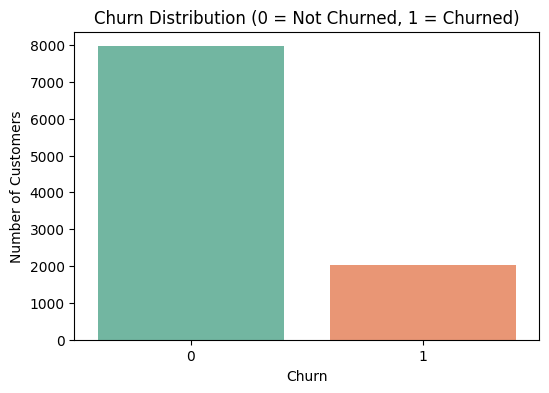

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Check class distribution (counts) ---
print("Class distribution (counts):")
print(df['churn'].value_counts())

# --- Check class distribution (percentage) ---
print("\nClass distribution (percentage):")
print(df['churn'].value_counts(normalize=True) * 100)

# --- Visualization ---
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df, palette="Set2")
plt.title("Churn Distribution (0 = Not Churned, 1 = Churned)")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()


The result shows that the dataset is imbalanced in which the non-churn is the majority class (79.63%) while churn is minority class (20.37%).

specify numeric and categorical columns

In [ ]:
# Separate features and target
X = df.drop(columns=['churn'])
y = df['churn']

# Identify column types
numeric_features = ['credit_score', 'age', 'tenure', 'balance',
                    'products_number', 'credit_card', 'active_member', 'estimated_salary']
categorical_features = ['country', 'gender']

build preprocessor

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Preprocessing: scale numeric, one-hot encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)


train test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


check balance

Class distribution (counts):
churn
0    7963
1    2037
Name: count, dtype: int64

Class distribution (percentage):
churn
0    79.63
1    20.37
Name: proportion, dtype: float64


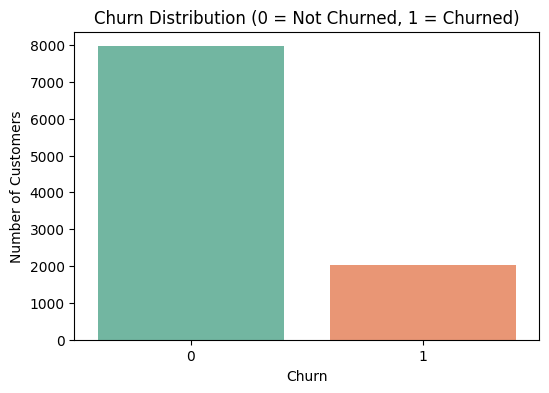

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Check class distribution (counts) ---
print("Class distribution (counts):")
print(df['churn'].value_counts())

# --- Check class distribution (percentage) ---
print("\nClass distribution (percentage):")
print(df['churn'].value_counts(normalize=True) * 100)

# --- Visualization ---
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df, palette="Set2")
plt.title("Churn Distribution (0 = Not Churned, 1 = Churned)")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()


pipelines + SMOTE

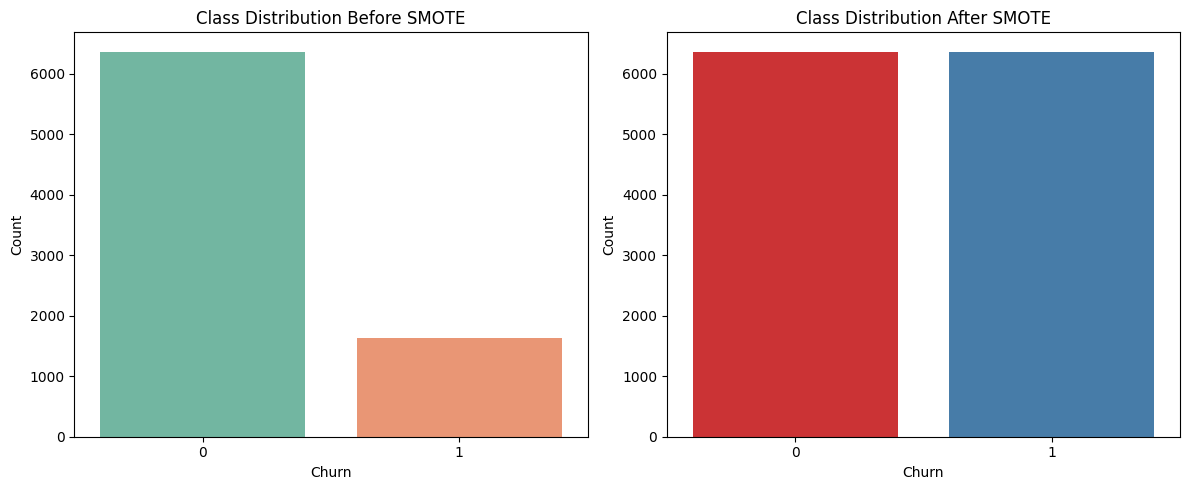

Before SMOTE:
 churn
0    6370
1    1630
Name: count, dtype: int64

After SMOTE:
 churn
1    6370
0    6370
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# --- Step 1: Split train-test ---
X = df.drop(columns=['churn'])
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- Step 2: Apply SMOTE just for visualization (ignore X_train here) ---
smote = SMOTE(random_state=42)
_, y_train_res = smote.fit_resample(X_train.select_dtypes(include=['number']), y_train)

# --- Step 3: Plot before & after SMOTE ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
sns.countplot(x=y_train, palette="Set2", ax=axes[0])
axes[0].set_title("Class Distribution Before SMOTE")
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Count")

# After SMOTE
sns.countplot(x=y_train_res, palette="Set1", ax=axes[1])
axes[1].set_title("Class Distribution After SMOTE")
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# --- Print exact counts ---
print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_res.value_counts())


After applying SMOTE, the class become balance.

cross-validation

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Define the pipelines with preprocessor, SMOTE, and classifiers
pipelines = {
    'LogisticRegression': ImbPipeline(steps=[
        ('preproc', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('clf', LogisticRegression(random_state=42))
    ]),
    'RandomForest': ImbPipeline(steps=[
        ('preproc', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('clf', RandomForestClassifier(random_state=42))
    ]),
    'XGBoost': ImbPipeline(steps=[
        ('preproc', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('clf', xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')) # Added eval_metric for silent warning
    ])
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}

for name, pipe in pipelines.items():
    print(f"Running CV for {name} ...")
    scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='f1')  # f1 is often useful for imbalanced
    cv_results[name] = scores
    print(f"  CV F1 mean: {scores.mean():.4f}  std: {scores.std():.4f}\n")

Running CV for LogisticRegression ...
  CV F1 mean: 0.4975  std: 0.0229

Running CV for RandomForest ...
  CV F1 mean: 0.5927  std: 0.0317

Running CV for XGBoost ...
  CV F1 mean: 0.5863  std: 0.0173



model training

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score
)

results = []
conf_matrices = {}

for name, pipe in pipelines.items():
    print(f"Training final model: {name}")
    pipe.fit(X_train, y_train)   # pipeline does preprocessing + SMOTE + fit on training set
    y_pred = pipe.predict(X_test)   # X_test is raw (preprocessor inside pipeline transforms it)
    y_proba = pipe.predict_proba(X_test)[:,1] if hasattr(pipe.named_steps['clf'], "predict_proba") else None

    # metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    results.append({
        'Model': name,
        'CV F1 Mean': cv_results[name].mean(),
        'Test Accuracy': acc,
        'Test Precision': prec,
        'Test Recall': rec,
        'Test F1': f1,
        'Test ROC-AUC': roc
    })

    conf_matrices[name] = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print("Confusion matrix:\n", conf_matrices[name])
    print("-"*60)


Training final model: LogisticRegression
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.70      0.50       407

    accuracy                           0.72      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.72      0.74      2000

Confusion matrix:
 [[1151  442]
 [ 121  286]]
------------------------------------------------------------
Training final model: RandomForest
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1593
           1       0.64      0.55      0.59       407

    accuracy                           0.84      2000
   macro avg       0.76      0.74      0.75      2000
weighted avg       0.84      0.84      0.84      2000

Confusion matrix:
 [[1465  128]
 [ 182  225]]
------------------------------------------------------------
Training final model: XGBoost
              precision   

In [ ]:
results_df = pd.DataFrame(results).sort_values(by='Test F1', ascending=False).reset_index(drop=True)
display(results_df)


,Model,CV F1 Mean,Test Accuracy,Test Precision,Test Recall,Test F1,Test ROC-AUC
0,XGBoost,0.586324,0.8555,0.675595,0.557740,0.611036,0.834779
1,RandomForest,0.592652,0.8450,0.637394,0.552826,0.592105,0.847872
2,LogisticRegression,0.497467,0.7185,0.392857,0.702703,0.503965,0.780775


visualization


LogisticRegression Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.70      0.50       407

    accuracy                           0.72      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.72      0.74      2000


RandomForest Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1593
           1       0.64      0.55      0.59       407

    accuracy                           0.84      2000
   macro avg       0.76      0.74      0.75      2000
weighted avg       0.84      0.84      0.84      2000


XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.68      0.56      0.61       407

    accuracy                           0.86      2000
   macro avg 

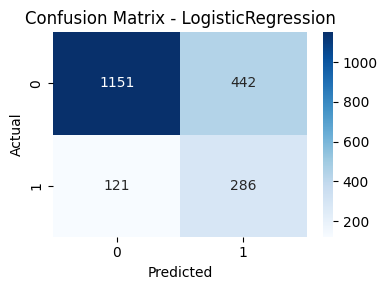

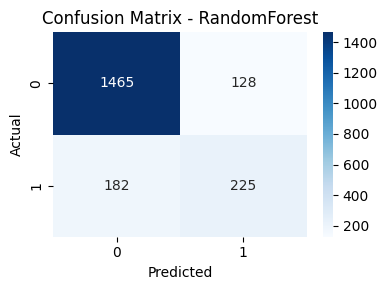

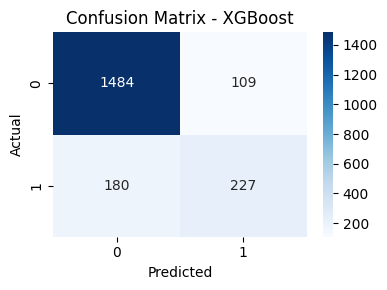


=== Summary Table ===
                Model  Accuracy  Precision    Recall  F1-score
2             XGBoost    0.8555   0.675595  0.557740  0.611036
1        RandomForest    0.8450   0.637394  0.552826  0.592105
0  LogisticRegression    0.7185   0.392857  0.702703  0.503965


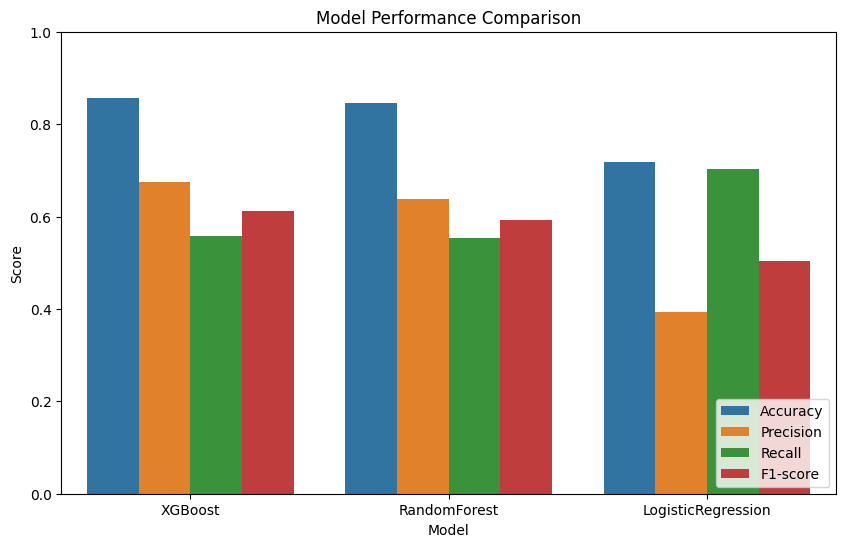

In [ ]:
# Choose which dict to use
models_to_evaluate = best_models if 'best_models' in globals() else pipelines

results = []
conf_matrices = {}

for name, model in models_to_evaluate.items():
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1
    })

    conf_matrices[name] = confusion_matrix(y_test, y_pred)

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

# Plot confusion matrices
for model_name, matrix in conf_matrices.items():
    plt.figure(figsize=(4, 3))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Summary table
results_df = pd.DataFrame(results).sort_values(by='F1-score', ascending=False)
print("\n=== Summary Table ===")
print(results_df)

# Barplot
plt.figure(figsize=(10,6))
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric')
plt.title("Model Performance Comparison")
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.show()


The result shows that XGBoost is the best model due to highest F1 score and rather high accuracy compare to other models.

hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grids = {
    'LogisticRegression': {
        'clf__C': [0.01, 0.1, 1, 10],      # Regularization strength
        'clf__penalty': ['l2'],            # L2 regularization (safe choice)
        'clf__solver': ['lbfgs']           # Solver compatible with L2
    },
    'RandomForest': {
        'clf__n_estimators': [100, 200, 300],    # Number of trees
        'clf__max_depth': [None, 5, 10, 20],     # Tree depth
        'clf__min_samples_split': [2, 5, 10]     # Min samples to split
    },
    'XGBoost': {
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [3, 5, 7],
        'clf__learning_rate': [0.01, 0.1, 0.2],
        'clf__subsample': [0.8, 1.0]
    }
}


In [ ]:
search_results = {}

for name, pipeline in pipelines.items():
    print(f"Tuning {name}...")

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_grids[name],
        n_iter=10,                # number of random combos to try
        scoring='f1',             # optimize for F1 score
        cv=5,                     # 5-fold cross-validation
        random_state=42,
        n_jobs=-1                 # use all CPUs
    )

    search.fit(X_train, y_train)

    search_results[name] = search
    print(f"Best params for {name}: {search.best_params_}")
    print(f"Best CV score: {search.best_score_:.4f}")


Tuning LogisticRegression...
Best params for LogisticRegression: {'clf__solver': 'lbfgs', 'clf__penalty': 'l2', 'clf__C': 0.1}
Best CV score: 0.5023
Tuning RandomForest...
Best params for RandomForest: {'clf__n_estimators': 300, 'clf__min_samples_split': 10, 'clf__max_depth': 10}
Best CV score: 0.6187
Tuning XGBoost...
Best params for XGBoost: {'clf__subsample': 0.8, 'clf__n_estimators': 100, 'clf__max_depth': 3, 'clf__learning_rate': 0.1}
Best CV score: 0.6219


In [ ]:
best_models = {name: search.best_estimator_ for name, search in search_results.items()}

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} classification report:\n")
    print(classification_report(y_test, y_pred))



LogisticRegression classification report:

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.70      0.50       407

    accuracy                           0.72      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.72      0.74      2000


RandomForest classification report:

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1593
           1       0.60      0.67      0.63       407

    accuracy                           0.84      2000
   macro avg       0.76      0.78      0.77      2000
weighted avg       0.85      0.84      0.85      2000


XGBoost classification report:

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1593
           1       0.63      0.65      0.64       407

    accuracy                           0.85      2000
   macro avg 

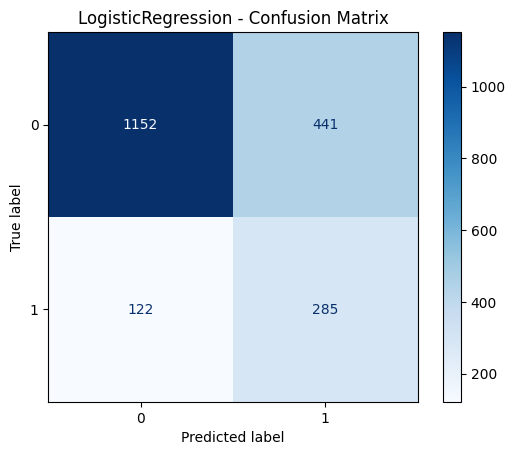

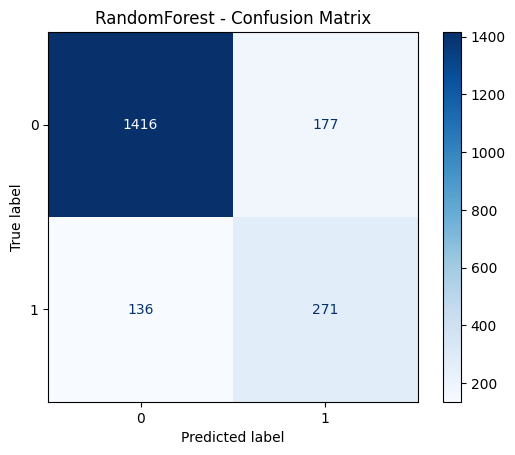

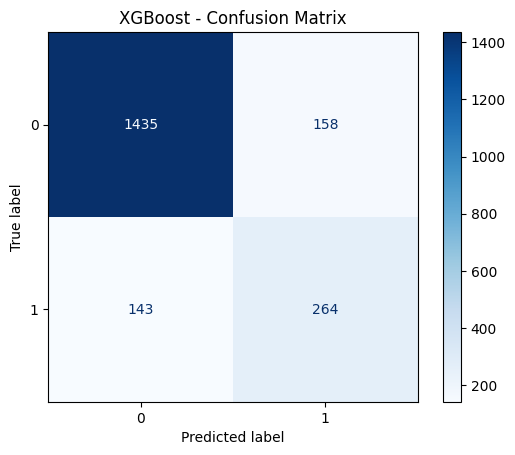

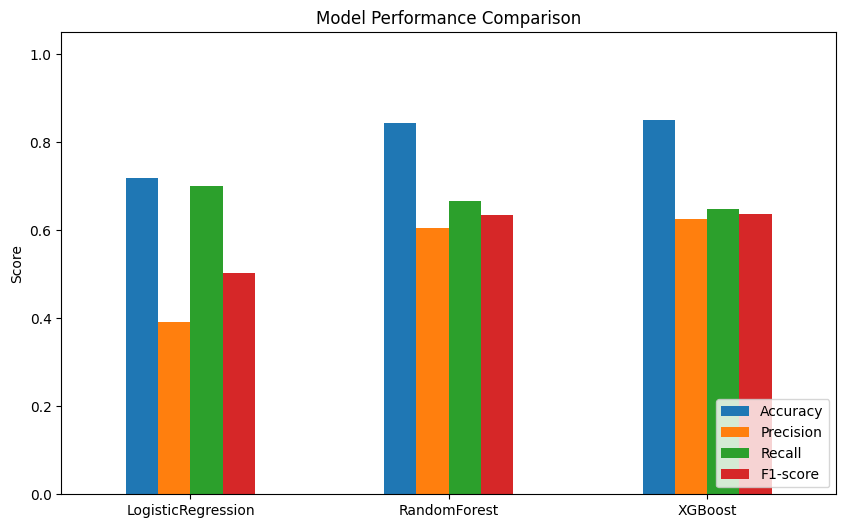

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Confusion Matrices for each model ---
for name, model in best_models.items():
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    disp.plot(cmap="Blues", values_format='d')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# --- Step 2: Collect metrics for bar chart ---
metrics_summary = {}

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    metrics_summary[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }

# Convert to DataFrame for plotting
metrics_df = pd.DataFrame(metrics_summary).T

# --- Step 3: Plot metrics comparison ---
metrics_df.plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.ylim(0, 1.05)
plt.show()


TASK Part C Question 8

feature importance using random forest

Top 10 features by importance:



,feature,importance
0,num__age,0.243043
1,num__products_number,0.130166
2,num__balance,0.115194
3,num__estimated_salary,0.099091
4,num__credit_score,0.094659
5,num__tenure,0.082263
6,cat__country_Germany,0.082210
7,cat__gender_Male,0.064826
8,cat__country_Spain,0.038508
9,num__active_member,0.034321


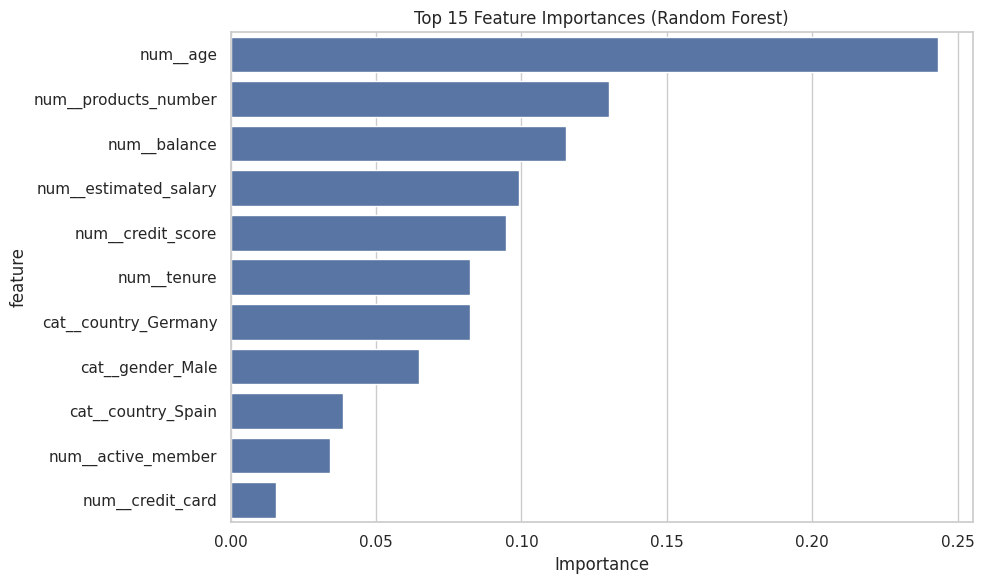


Random Forest classification report on test set:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1593
           1       0.65      0.56      0.60       407

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.84      0.85      0.84      2000



In [ ]:
# --- Imports (if not already imported) ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

sns.set(style="whitegrid")

# --- 1) Prepare X, y and split (do this once in your notebook) ---
X = df.drop(columns=['churn'])
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- 2) Build a pipeline that matches your earlier preprocessor + SMOTE + RF ---
# If you already have `preprocessor` defined, this uses it. If not, define it similar to previous:
# numeric and categorical lists (adjust if your columns differ)
numeric_features = ['credit_score', 'age', 'tenure', 'balance',
                    'products_number', 'credit_card', 'active_member', 'estimated_salary']
categorical_features = ['country', 'gender']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

smote = SMOTE(random_state=42)

rf_pipe = ImbPipeline(steps=[
    ('preproc', preprocessor),
    ('smote', smote),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
])

# --- 3) Fit pipeline on training data ---
rf_pipe.fit(X_train, y_train)

# --- 4) Get feature names after preprocessing ---
# ColumnTransformer provides get_feature_names_out in sklearn >=1.0
# it returns names like "num__credit_score" etc., but we just need final names.
preproc = rf_pipe.named_steps['preproc']
try:
    # If sklearn >=1.0
    feature_names = preproc.get_feature_names_out()
except Exception:
    # fallback: create names manually:
    # numeric names are numeric_features; for onehot, extract categories
    ohe = preproc.named_transformers_['cat'].named_steps['ohe']
    cat_names = list(ohe.get_feature_names_out(categorical_features))
    feature_names = numeric_features + cat_names

# --- 5) Get importances from the RandomForest classifier ---
rf_clf = rf_pipe.named_steps['clf']
importances = rf_clf.feature_importances_

# create dataframe of importances
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False).reset_index(drop=True)

# --- 6) Show top features and plot ---
print("Top 10 features by importance:\n")
display(feat_imp_df.head(10))

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp_df.head(15), x='importance', y='feature')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Optional: evaluate the RF quickly on test set
y_pred = rf_pipe.predict(X_test)
print("\nRandom Forest classification report on test set:")
print(classification_report(y_test, y_pred))


TASK Part C Question 9

Create age groups and analyze

Age range use for grouping:

*   Group A: 18–30
*   Group B: 31–45
*   Group C: 46–60
*   Group D: 61+

age_group
18-30     7.520325
31-45    15.740584
46-60    51.123254
61+      24.784483
Name: churn, dtype: float64


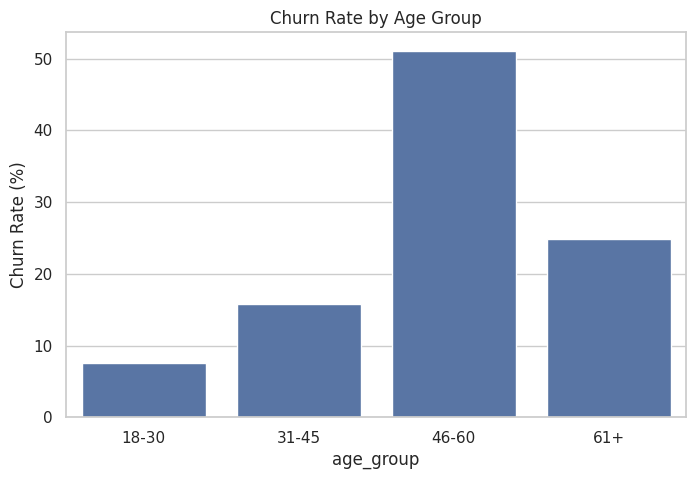

In [ ]:
#9)
# Create age groups
bins = [18, 31, 46, 61, df['age'].max() + 1]
labels = ['18-30', '31-45', '46-60', '61+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Churn rate by age group
churn_by_age = df.groupby('age_group')['churn'].mean() * 100
print(churn_by_age)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_by_age.index, y=churn_by_age.values)
plt.title('Churn Rate by Age Group')
plt.ylabel('Churn Rate (%)')
plt.show()

9) Age groups: 18-30, 31-45, 46-60, 61+.
Churn rates calculated per group. The 46-60 group has the highest churn risk, possibly due to life transitions like pre-retirement dissatisfaction or competitive offers.


In [ ]:
# Identify highest churn risk group
highest_group = churn_by_age.idxmax()
highest_rate = churn_by_age.max()

print(f"Highest churn risk group: {highest_group} with churn rate = {highest_rate:.2f}%")


Highest churn risk group: 46-60 with churn rate = 51.12%


The result shows that customers aged 46-60 are most likely to leave the bank. The possible reason for the high churn rate is due to life transitions like pre-retirement dissatisfaction or competitive offers. People in this age range are more mature in financing and are more sensitive to interest rates, fees and charges, or quality of service. If another bank offer better service experience or higher interest rates, this customers may tend to churn.

TASK Part D Question 10

Recall is the most important metric, as it focuses on identifying as many true churned customers as possible, minimizing false negatives. This aligns with the bank's goal of proactive retention, where missing churners is costlier than false positives.

TASK Part D Question 11

In [ ]:
# helper: get final feature names after ColumnTransformer
def get_feature_names_from_preprocessor(preproc, numeric_features, categorical_features):
    # numeric names:
    names = list(numeric_features)
    # categorical: use OneHotEncoder inside pipeline
    try:
        ohe = preproc.named_transformers_['cat'].named_steps['ohe']
        cat_names = list(ohe.get_feature_names_out(categorical_features))
    except Exception:
        # fallback: some versions store ohe directly
        ohe = preproc.named_transformers_['cat']
        cat_names = list(ohe.get_feature_names_out(categorical_features))
    return names + cat_names

numeric_features = ['credit_score','age','tenure','balance','products_number','credit_card','active_member','estimated_salary']
categorical_features = ['country','gender']

top_features = {}

for name, model in best_models.items():
    preproc = model.named_steps['preproc']
    clf = model.named_steps['clf']

    feat_names = get_feature_names_from_preprocessor(preproc, numeric_features, categorical_features)

    if hasattr(clf, 'feature_importances_'):  # tree-based
        imp = clf.feature_importances_
        df_imp = pd.DataFrame({'feature': feat_names, 'importance': imp})
        df_imp = df_imp.sort_values('importance', ascending=False).reset_index(drop=True)
        top = df_imp.head(10)
        top_features[name] = top
        print(f"\nTop features for {name} (by importance):")
        display(top)
    elif hasattr(clf, 'coef_'):  # linear models
        coef = clf.coef_.ravel()
        df_coef = pd.DataFrame({'feature': feat_names, 'coef': coef})
        df_coef['abs_coef'] = df_coef['coef'].abs()
        df_coef = df_coef.sort_values('abs_coef', ascending=False).reset_index(drop=True)
        top = df_coef.head(10)
        top_features[name] = top
        print(f"\nTop features for {name} (by absolute coefficient):")
        display(top[['feature','coef']].head(10))
    else:
        print(f"Cannot extract importances for {name} (unknown classifier type).")



Top features for LogisticRegression (by absolute coefficient):


,feature,coef
0,country_Germany,0.975977
1,age,0.895191
2,gender_Male,-0.569958
3,active_member,-0.444609
4,balance,0.135210
5,products_number,-0.126553
6,credit_score,-0.073845
7,estimated_salary,0.061766
8,country_Spain,-0.027921
9,credit_card,-0.023136



Top features for RandomForest (by importance):


,feature,importance
0,age,0.303973
1,products_number,0.185975
2,country_Germany,0.124470
3,gender_Male,0.088763
4,balance,0.087594
5,country_Spain,0.044984
6,active_member,0.044165
7,tenure,0.039741
8,estimated_salary,0.038796
9,credit_score,0.035677



Top features for XGBoost (by importance):


,feature,importance
0,gender_Male,0.174672
1,age,0.172762
2,products_number,0.149225
3,country_Germany,0.145825
4,active_member,0.110873
5,country_Spain,0.100897
6,tenure,0.058036
7,balance,0.044712
8,estimated_salary,0.015091
9,credit_card,0.014603


Based on the result from Random Forest, the two key factors that strongly influence customers churn:

1.   Age - Older customers are more likely to churn, possibly due to changing financial needs.
2.   Products_number - Customers with fewer products churn more, indicating lower engagement.




